<a href="https://colab.research.google.com/github/SebasGx-Git/TB2-IA/blob/main/TB2_plataformas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from   IPython.display import clear_output

In [ ]:
from   sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.neural_network import MLPClassifier
# from sklearn.kdatasets import make_classification
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Redes Neuronales (sklearn)

En la práctica se usa esta implementación de Redes Neuoronales


https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised

In [ ]:
def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds) 
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0) 
    accst = f'Acc = {acc:.4f}'    
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training   
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt) 
    accst = f'Acc = {acc:.4f}'    
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing


def plot_loss(loss_train):
    plt.figure(figsize=[8,6])
    plt.plot(loss_train,'r',linewidth=1.5)
    # plt.plot(loss_val,'b',linewidth=1.5)
    # plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.title('Training Loss',fontsize=14)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    plt.grid(True)
    plt.show()


# Plataformas

In [ ]:
# Campos
# ID: The title ID on JustWatch.
# title: The name of the title.
# show type: TV show or movie. | SHOW || MOVIE
# description: A brief description.
# release year: The release year.
# age certification: The age certification.
# runtime: The length of the episode (SHOW) or movie.
# genres: A list of genres.
# production countries: A list of countries that produced the title.
# seasons: Number of seasons if it's a SHOW.
# IMDB ID: The title ID on IMDB.
# IMDB Score: Score on IMDB.
# IMDB Votes: Votes on IMDB.
# TMDB Popularity: Popularity on TMDB.
# TMDB Score: Score on TMDB.

# id	title	type	description	release_year
# age_certification	runtime	genres	production_countries	seasons
# imdb_id	imdb_score	imdb_votes	tmdb_popularity	tmdb_score

In [ ]:
class Platform:
  def __init__(self, filename,
               cols:list = ['runtime', 'age_certification'], # 'release_year', 
              #  colsF:list = ['age_certification'], #,'genres' 'age_certification', 
               label = 'imdb_score',
               labelSubd = (0,10,1), #(0,100,10), # (min,max,step) # or None
               ptrain = 0.8 #,
              #  cols_drop = ['description','seasons','imdb_id','tmdb_popularity','imdb_votes','tmdb_score']
              ):
    self.filename = f'data/{filename}.csv'
    self.df_ini = pd.read_csv(self.filename)
    self.df_ini['age_certification'] = self.df_ini['age_certification'].fillna('APT')

    cols_drop = []
    for c in self.df_ini.columns:
      if c not in cols+[label]: cols_drop += [c]
    self.df = self.df_ini.drop(columns=cols_drop)
    self.df = self.df.dropna().drop_duplicates()

    self.cols = cols
    # si usamos columnas categoricas, se deben convertir a int
    for c in cols:
      if self.df.dtypes[c] == object:
        # print('obj')
        le = LabelEncoder()
        le.fit(self.df[c])
        # list(le.classes_)
        self.df[f'{c}_bk'] = self.df[c]
        self.df[c] = le.transform(self.df[c])
        # self.cols += [f'{c}_n']
    
    if labelSubd != None:
      _min, _max, _step = labelSubd
      bins = np.arange(_min, _max+1, _step)
      names = np.arange( (_max - _min)/_step, dtype=int )
      self.df.loc[self.df[label] > _max, label] = _max
      self.df[f'{label}_bk'] = self.df[label]
      self.df[label] = pd.cut(self.df[label], bins, labels=names)      

    self.n = len(self.df)
    self.n_train = int( self.n * ptrain )
    # self.n_test = self.n - self.n_test
    # df_dm[['release_year', 'age_certification', 'runtime', 'genres']]
    self.x_train = np.array(self.df[self.cols][:self.n_train])
    self.y_train = np.ravel(self.df[label][:self.n_train])#.astype('float')
    # self.y_train = np.floor(self.y_train)
    self.x_test = np.array(self.df[self.cols][self.n_train+1:])
    self.y_test = np.ravel(self.df[label][self.n_train+1:])#.astype('float')
    # self.y_test = np.floor(self.y_test)
    

## Dark Matter

In [ ]:
dm = Platform('titles_DarkMatter')

In [ ]:
dm.x_train

array([[ 94,   0],
       [ 66,   0],
       [101,   0],
       ...,
       [ 94,   0],
       [ 70,   0],
       [ 76,   0]])

In [ ]:
dm.y_test

array([5, 2, 4, 3, 6, 5, 4, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 5, 3, 3, 3, 6,
       2, 2, 2, 4, 2, 5, 4, 4, 5, 5, 5, 2, 2, 4, 5, 2, 3, 3, 2, 5, 3, 3,
       4, 4, 5, 6, 3, 2, 3, 3, 5, 3, 3, 2, 6, 4, 3, 5, 4, 7, 4, 3, 4, 4,
       3, 6, 3, 4, 5, 5, 4, 5, 4, 3, 2, 4, 5, 5, 4, 2, 3, 5, 6, 5, 4, 3,
       3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 6, 2, 4, 3, 3, 4, 3, 2, 4, 5,
       4, 5, 3, 4, 2, 2, 3, 3, 5, 4, 5, 3, 4, 4, 3, 2, 7, 4, 3, 4, 3, 3,
       3, 4, 4, 5, 2, 5, 8, 3, 3, 3, 3, 4, 5, 5, 6, 3, 2, 3, 8, 3, 5, 6,
       4, 3, 4])

In [ ]:
dm.df #.dtypes['id'] == object #['imdb_score'] #tmdb_popularity

,age_certification,runtime,imdb_score,age_certification_bk,imdb_score_bk
0,0,94,7,APT,7.9
1,0,66,7,APT,7.3
2,0,101,7,APT,7.5
3,0,95,7,APT,7.3
4,0,103,7,APT,7.8
...,...,...,...,...,...
1015,0,81,5,APT,5.6
1017,0,108,6,APT,7.0
1018,5,113,4,R,4.9
1020,5,90,3,R,4.0


In [ ]:
print(len(dm.x_train), len(dm.x_test))

631 157


In [ ]:
# Definitions
alpha       = 1e-5          # learning rate
nh          = (10,6)        # nodes of hidden layers
tmax        = 2000          # max number of iterations
solver      = 'adam'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'logistic'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha,hidden_layer_sizes=nh, 
                    random_state=1,max_iter=tmax, activation=activation)
clf.fit(dm.x_train, dm.y_train)

# Evaluation on training subset 
y0  = clf.predict(dm.x_train)
    
# Evaluation on testing subset 
ypred  = clf.predict(dm.x_test)


In [ ]:
# clf,X,d,Xt,dt,d0,ds,st,decisionline=1
# show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,nn_st,decisionline=1)

Training:
Confusion Matrix:
[[  0   0   0   3   1   0   0   0]
 [  0   0   0  34  10   0   0   0]
 [  0   0   0  72  42   0   0   0]
 [  0   0   0 100  62   0   0   0]
 [  0   0   0  83  76   0   0   0]
 [  0   0   0  44  54   0   0   0]
 [  0   0   0  23  26   0   0   0]
 [  0   0   0   1   0   0   0   0]]
Accuracy = 27.89
Testing:
Confusion Matrix:
[[ 0  0 18  3  0  0  0]
 [ 0  0 32 19  0  0  0]
 [ 0  0 21 19  0  0  0]
 [ 0  0 21 10  0  0  0]
 [ 0  0  5  5  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  2  0  0  0  0]]
Accuracy = 19.75


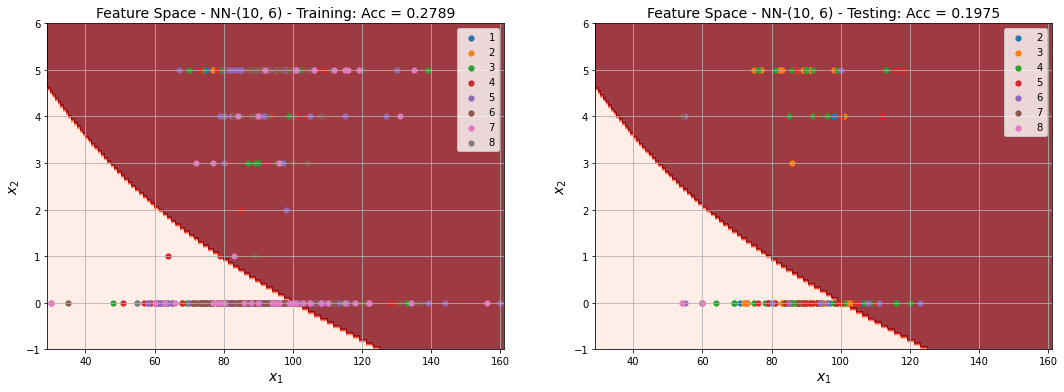

In [ ]:
# Display results 
show_clf_results(clf,dm.x_train,dm.y_train,dm.x_test,dm.y_test,y0,ypred,nn_st,decisionline=1)

## Video Games

In [ ]:
class VideoGames:
  def __init__(self, filename,
               cols:list = ['Length.Completionists.Median', 'Metrics.Used Price'], # 'release_year', 
              #  colsF:list = ['age_certification'], #,'genres' 'age_certification', 
               label = 'Metrics.Review Score',
               labelSubd = (0,100,25), #(0,100,10), # (min,max,step) # or None
               ptrain = 0.8 #,
              #  cols_drop = ['description','seasons','imdb_id','tmdb_popularity','imdb_votes','tmdb_score']
              ):
    self.filename = f'data/{filename}.csv'
    self.df_ini = pd.read_csv(self.filename)
    # self.df_ini['Metrics.Used Price'] = self.df_ini['Length.All PlayStyles.Median'].fillna('APT')

    cols_drop = []
    for c in self.df_ini.columns:
      if c not in cols+[label]: cols_drop += [c]
    self.df = self.df_ini.drop(columns=cols_drop)
    self.df = self.df.dropna().drop_duplicates()

    self.cols = cols
    # si usamos columnas categoricas, se deben convertir a int
    for c in cols:
      if self.df.dtypes[c] == object:
        # print('obj')
        le = LabelEncoder()
        le.fit(self.df[c])
        # list(le.classes_)
        self.df[f'{c}_bk'] = self.df[c]
        self.df[c] = le.transform(self.df[c])
        # self.cols += [f'{c}_n']
    
    if labelSubd != None:
      _min, _max, _step = labelSubd
      bins = np.arange(_min, _max+1, _step)
      names = np.arange( (_max - _min)/_step, dtype=int )
      self.df.loc[self.df[label] > _max, label] = _max
      self.df[f'{label}_bk'] = self.df[label]
      self.df[label] = pd.cut(self.df[label], bins, labels=names)      

    self.n = len(self.df)
    self.n_train = int( self.n * ptrain )
    # self.n_test = self.n - self.n_test
    # df_dm[['release_year', 'age_certification', 'runtime', 'genres']]
    self.x_train = np.array(self.df[self.cols][:self.n_train])
    self.y_train = np.ravel(self.df[label][:self.n_train])#.astype('float')
    # self.y_train = np.floor(self.y_train)
    self.x_test = np.array(self.df[self.cols][self.n_train+1:])
    self.y_test = np.ravel(self.df[label][self.n_train+1:])#.astype('float')
    # self.y_test = np.floor(self.y_test)

In [ ]:
vg = VideoGames('video_games')

In [ ]:
vg.x_train

array([[30.        , 24.95      ],
       [ 0.        , 14.95      ],
       [ 7.25      , 22.95      ],
       ...,
       [17.        , 16.95      ],
       [13.5       , 16.95      ],
       [39.16666667, 17.95      ]])

In [ ]:
vg.y_test

array([3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       1, 2, 3, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 3, 1, 3, 3, 1, 3, 2, 2, 3, 2, 1, 1,
       3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1])

In [ ]:
vg.df #.dtypes['id'] == object #['Features.Handheld?'] #tmdb_popularity

,Metrics.Review Score,Metrics.Used Price,Length.Completionists.Median,Metrics.Review Score_bk
0,3,24.95,30.000000,85
1,3,14.95,0.000000,89
2,3,22.95,7.250000,81
3,3,12.95,0.000000,81
4,2,14.95,72.566667,61
...,...,...,...,...
1206,2,12.95,12.866667,67
1207,2,17.95,12.000000,71
1209,2,15.95,0.000000,51
1210,2,17.95,12.000000,64


In [ ]:
print(len(vg.x_train), len(vg.x_test))

750 187


In [ ]:
# Definitions
alpha       = 1e-5          # learning rate
nh          = (4,2)        # nodes of hidden layers
tmax        = 2000          # max number of iterations
solver      = 'adam'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'logistic'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=nh, random_state=1, max_iter=tmax, activation=activation)
clf.fit(vg.x_train, vg.y_train)

# Evaluation on training subset 
y0 = clf.predict(vg.x_train)
    
# Evaluation on testing subset 
ypred = clf.predict(vg.x_test)

In [ ]:
# clf,X,d,Xt,dt,d0,ds,st,decisionline=1
# show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,nn_st,decisionline=1)

Training:
Confusion Matrix:
[[  0   0   3   0]
 [  0   0  61   8]
 [  0   0 289 104]
 [  0   0 155 130]]
Accuracy = 55.87
Testing:
Confusion Matrix:
[[ 0 23  1]
 [ 0 75 27]
 [ 0 25 36]]
Accuracy = 59.36


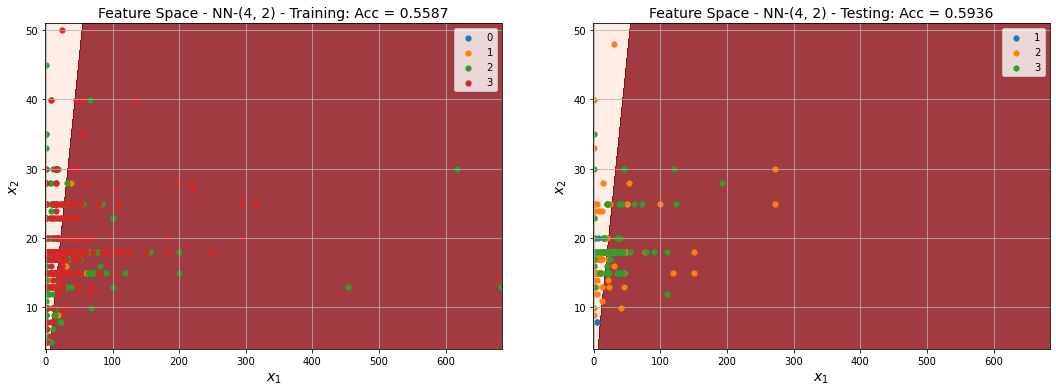

In [ ]:
# Display results 
show_clf_results(clf, vg.x_train, vg.y_train, vg.x_test, vg.y_test, y0, ypred, nn_st, decisionline=1)

## EJEMPLO PELICULAS


In [ ]:
class Platform2:
  def __init__(self, filename,
               cols:list = ['critic_score', 'total_reviews'], # 'release_year', 
              #  colsF:list = ['age_certification'], #,'genres' 'age_certification', 
               label = 'people_score',
               labelSubd = (0,10,1), #(0,100,10), # (min,max,step) # or None
               ptrain = 0.8 #,
              #  cols_drop = ['description','seasons','imdb_id','tmdb_popularity','imdb_votes','tmdb_score']
              ):
    self.filename = f'data/{filename}.csv'
    self.df_ini = pd.read_csv(self.filename)
    self.df_ini['total_reviews'] = self.df_ini['total_reviews']#.fillna('APT')

    cols_drop = []
    for c in self.df_ini.columns:
      if c not in cols+[label]: cols_drop += [c]
    self.df = self.df_ini.drop(columns=cols_drop)
    self.df = self.df.dropna().drop_duplicates()

    self.cols = cols
    # si usamos columnas categoricas, se deben convertir a int
    for c in cols:
      if self.df.dtypes[c] == object:
        # print('obj')
        le = LabelEncoder()
        le.fit(self.df[c])
        # list(le.classes_)
        self.df[f'{c}_bk'] = self.df[c]
        self.df[c] = le.transform(self.df[c])
        # self.cols += [f'{c}_n']
    
    if labelSubd != None:
      _min, _max, _step = labelSubd
      bins = np.arange(_min, _max+1, _step)
      names = np.arange( (_max - _min)/_step, dtype=int )
      self.df.loc[self.df[label] > _max, label] = _max
      self.df[f'{label}_bk'] = self.df[label]
      self.df[label] = pd.cut(self.df[label], bins, labels=names)      

    self.n = len(self.df)
    self.n_train = int( self.n * ptrain )
    # self.n_test = self.n - self.n_test
    # df_dm[['release_year', 'age_certification', 'runtime', 'genres']]
    self.x_train = np.array(self.df[self.cols][:self.n_train])
    self.y_train = np.ravel(self.df[label][:self.n_train])#.astype('float')
    # self.y_train = np.floor(self.y_train)
    self.x_test = np.array(self.df[self.cols][self.n_train+1:])
    self.y_test = np.ravel(self.df[label][self.n_train+1:])#.astype('float')
    # self.y_test = np.floor(self.y_test)
    

In [ ]:
di = Platform2('peliculas')

In [ ]:
di.x_train

array([[ 96, 519],
       [ 94, 538],
       [ 97, 433],
       ...,
       [ 96,  79],
       [ 94, 140],
       [ 95,  92]])

In [ ]:
di.y_test


array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
di.df

,critic_score,people_score,total_reviews,people_score_bk
0,96,9,519,10.0
1,94,9,538,10.0
2,97,9,433,10.0
3,97,9,427,10.0
4,97,9,387,10.0
...,...,...,...,...
1605,15,9,101,10.0
1606,16,9,55,10.0
1607,14,9,103,10.0
1608,12,9,152,10.0


In [ ]:
print(len(di.x_train), len(di.x_test))

782 195


In [ ]:
alpha       = 1e-5          # learning rate
nh          = (10,6)        # nodes of hidden layers
tmax        = 2000          # max number of iterations
solver      = 'adam'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'logistic'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=nh, random_state=1, max_iter=tmax, activation=activation)
clf.fit(di.x_train, di.y_train)

# Evaluation on training subset 
y0 = clf.predict(di.x_train)
    
# Evaluation on testing subset 
ypred = clf.predict(di.x_test)

Training:
Confusion Matrix:
[[782]]
Accuracy = 100.00
Testing:
Confusion Matrix:
[[195]]
Accuracy = 100.00


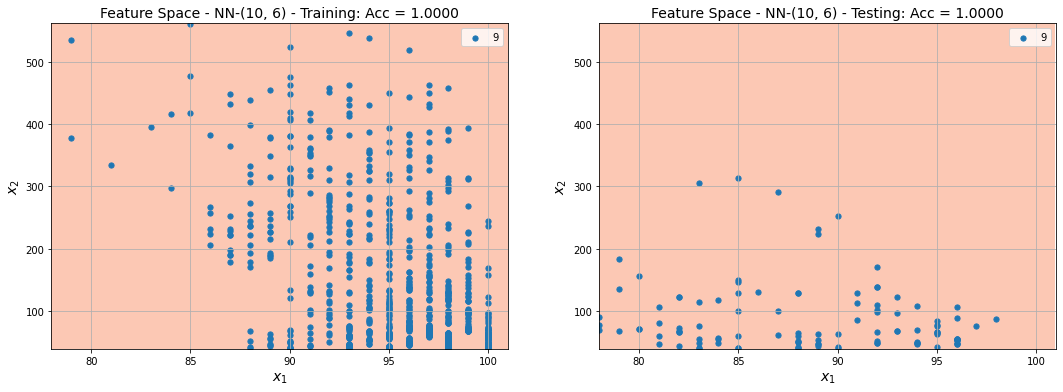

In [ ]:
show_clf_results(clf,di.x_train,di.y_train,di.x_test,di.y_test,y0,ypred,nn_st,decisionline=1)

## CRUNCHYROLL



In [ ]:
class PlatformCrunchyroll:
  def __init__(self, filename,
               cols:list = ['runtime', 'age_certification'], # 'release_year', 
              #  colsF:list = ['age_certification'], #,'genres' 'age_certification', 
               label = 'imdb_score',
               labelSubd = (0,10,1), #(0,100,10), # (min,max,step) # or None
               ptrain = 0.8 #,
              #  cols_drop = ['description','seasons','imdb_id','tmdb_popularity','imdb_votes','tmdb_score']
              ):
    self.filename = f'data/{filename}.csv'
    self.df_ini = pd.read_csv(self.filename)
    self.df_ini['age_certification'] = self.df_ini['age_certification'].fillna('APT')

    cols_drop = []
    for c in self.df_ini.columns:
      if c not in cols+[label]: cols_drop += [c]
    self.df = self.df_ini.drop(columns=cols_drop)
    self.df = self.df.dropna().drop_duplicates()

    self.cols = cols
    # si usamos columnas categoricas, se deben convertir a int
    for c in cols:
      if self.df.dtypes[c] == object:
        # print('obj')
        le = LabelEncoder()
        le.fit(self.df[c])
        # list(le.classes_)
        self.df[f'{c}_bk'] = self.df[c]
        self.df[c] = le.transform(self.df[c])
        # self.cols += [f'{c}_n']
    
    if labelSubd != None:
      _min, _max, _step = labelSubd
      bins = np.arange(_min, _max+1, _step)
      names = np.arange( (_max - _min)/_step, dtype=int )
      self.df.loc[self.df[label] > _max, label] = _max
      self.df[f'{label}_bk'] = self.df[label]
      self.df[label] = pd.cut(self.df[label], bins, labels=names)      

    self.n = len(self.df)
    self.n_train = int( self.n * ptrain )
    # self.n_test = self.n - self.n_test
    # df_dm[['release_year', 'age_certification', 'runtime', 'genres']]
    self.x_train = np.array(self.df[self.cols][:self.n_train])
    self.y_train = np.ravel(self.df[label][:self.n_train])#.astype('float')
    # self.y_train = np.floor(self.y_train)
    self.x_test = np.array(self.df[self.cols][self.n_train+1:])
    self.y_test = np.ravel(self.df[label][self.n_train+1:])#.astype('float')
    # self.y_test = np.floor(self.y_test)

In [ ]:
cr = PlatformCrunchyroll('crunchyroll_titles')

In [ ]:
cr.x_train

array([[ 23,   2],
       [ 25,   7],
       [ 24,   5],
       [ 24,   2],
       [ 24,   5],
       [ 25,   5],
       [ 29,   0],
       [ 23,   0],
       [ 24,   3],
       [ 24,   0],
       [  7,   0],
       [ 24,   5],
       [ 24,   2],
       [ 25,   4],
       [ 24,   0],
       [ 24,   7],
       [ 27,   0],
       [ 25,   0],
       [ 25,   0],
       [ 25,   0],
       [ 24,   0],
       [ 24,   0],
       [ 24,   3],
       [ 23,   0],
       [ 24,   0],
       [ 23,   2],
       [ 25,   2],
       [ 23,   4],
       [ 23,   2],
       [ 24,   4],
       [ 22,   6],
       [ 25,   2],
       [ 25,   2],
       [ 25,   2],
       [ 24,   5],
       [ 24,   7],
       [ 24,   2],
       [ 25,   7],
       [ 25,   5],
       [ 23,   5],
       [ 90,   0],
       [ 24,   0],
       [ 23,   2],
       [ 22,   5],
       [ 25,   2],
       [ 31,   0],
       [ 23,   0],
       [ 23,   5],
       [ 22,   4],
       [ 28,   0],
       [ 25,   4],
       [ 23,   2],
       [ 23,

In [ ]:
cr.y_test

array([4, 6, 5, 7, 6, 3, 5, 5, 7, 4, 3, 7, 5, 6, 4, 5, 6, 3, 5, 3, 6, 5,
       8, 2, 6, 5, 5, 4, 5, 7, 6, 4, 5, 5, 6, 8, 8, 8, 8, 6, 6, 7, 8, 5,
       7, 6, 5, 6, 7, 7, 8, 6, 7, 4, 6, 6, 6, 6, 5, 5, 6, 5, 4, 6, 5, 4,
       4, 6, 5, 7, 5, 5, 6, 5, 4, 5, 6, 5, 5, 8, 8, 7, 5, 6, 4, 6, 7, 6,
       7, 5, 1, 6, 6, 1, 6, 5, 6, 4, 7, 5, 3, 4])

In [ ]:
cr.df #.dtypes['id'] == object #['imdb_score'] #tmdb_popularity

,age_certification,runtime,imdb_score,age_certification_bk,imdb_score_bk
0,2,23,7,TV-14,7.9
1,7,25,7,TV-Y7,7.9
2,5,24,7,TV-PG,7.8
3,2,24,7,TV-14,8.0
4,5,24,8,TV-PG,8.1
...,...,...,...,...,...
1070,2,24,4,TV-14,5.0
1074,0,25,7,APT,7.4
1078,0,2,5,APT,5.6
1079,0,1,3,APT,4.0


In [ ]:
print(len(cr.x_train), len(cr.x_test))

408 102


In [ ]:
# Definitions
alpha       = 1e-5          # learning rate
nh          = (85,75)        # nodes of hidden layers
tmax        = 5000          # max number of iterations
solver      = 'lbfgs'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'tanh'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=nh, random_state=1, max_iter=tmax, activation=activation)
clf.fit(cr.x_train, cr.y_train)

# Evaluation on training subset 
y0 = clf.predict(cr.x_train)
    
# Evaluation on testing subset 
ypred = clf.predict(cr.x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training:
Confusion Matrix:
[[  0   0   1   1   0   0   0]
 [  0   4   3   6   8   0   0]
 [  0   1  21  16  33   0   0]
 [  0   0   5  59  58   0   0]
 [  0   0   1  34 104   0   0]
 [  0   0   2  13  36   1   0]
 [  0   0   0   0   0   0   1]]
Accuracy = 46.57
Testing:
Confusion Matrix:
[[ 0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  2  1  2  0]
 [ 0  0  0  0  1  5  7  0]
 [ 0  0  0  1  6 12 10  0]
 [ 0  0  0  1  4 10 13  1]
 [ 0  0  0  1  0  8  5  0]
 [ 0  0  0  0  0  2  7  0]]
Accuracy = 20.59


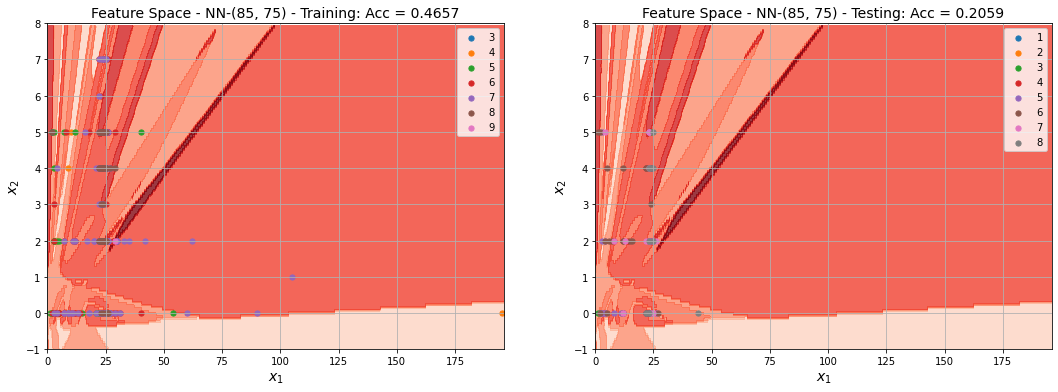

In [ ]:
# Display results 
show_clf_results(clf, cr.x_train, cr.y_train, cr.x_test, cr.y_test, y0,ypred, nn_st, decisionline=1)


# Netflix

In [ ]:
nt = Platform('netflix_titles')

In [ ]:
nt.x_train

array([[113,   5],
       [ 91,   3],
       [ 94,   5],
       ...,
       [119,   0],
       [ 30,   8],
       [108,   0]])

In [ ]:
nt.y_test

array([7, 4, 4, 6, 5, 3, 6, 3, 6, 6, 5, 7, 3, 6, 2, 3, 6, 3, 4, 8, 5, 4,
       5, 6, 5, 6, 6, 4, 7, 6, 7, 3, 4, 5, 7, 6, 6, 5, 3, 7, 8, 6, 8, 5,
       6, 6, 7, 5, 6, 4, 8, 5, 7, 5, 6, 5, 6, 4, 7, 6, 6, 7, 6, 5, 6, 6,
       5, 5, 5, 5, 5, 4, 4, 7, 3, 5, 3, 5, 7, 7, 5, 3, 7, 6, 5, 6, 6, 4,
       8, 5, 5, 3, 7, 4, 6, 3, 6, 4, 7, 5, 6, 6, 7, 6, 4, 6, 2, 5, 5, 4,
       7, 4, 6, 7, 4, 7, 7, 2, 6, 6, 6, 3, 4, 4, 6, 6, 6, 5, 7, 5, 5, 4,
       4, 7, 6, 8, 4, 6, 4, 6, 7, 8, 6, 6, 3, 8, 5, 8, 7, 8, 6, 5, 5, 7,
       5, 5, 3, 7, 6, 5, 8, 7, 7, 4, 7, 6, 4, 6, 5, 6, 6, 5, 4, 6, 5, 5,
       4, 4, 7, 6, 6, 5, 6, 5, 7, 5, 7, 3, 4, 5, 6, 5, 4, 6, 7, 6, 6, 5,
       6, 6, 6, 6, 6, 4, 5, 5, 2, 5, 7, 8, 5, 4, 5, 7, 5, 6, 6, 5, 6, 7,
       5, 4, 7, 7, 3, 5, 7, 6, 7, 6, 7, 6, 7, 4, 5, 6, 2, 5, 2, 7, 6, 7,
       4, 4, 8, 6, 6, 6, 4, 6, 7, 4, 5, 7, 9, 5, 7, 6, 5, 7, 7, 6, 7, 5,
       7, 6, 6, 7, 6, 6, 6, 5, 6, 6, 2, 4, 7, 6, 6, 8, 6, 6, 7, 6, 6, 7,
       7, 6, 7, 6, 5, 7, 5, 7, 7, 5, 4, 7, 6, 5, 6,

In [ ]:
nt.df #.dtypes['id'] == object #['imdb_score'] #tmdb_popularity

,age_certification,runtime,imdb_score,age_certification_bk,imdb_score_bk
1,5,113,8,R,8.3
2,3,91,8,PG,8.2
3,5,94,7,R,8.0
4,5,133,8,R,8.1
5,6,30,8,TV-14,8.8
...,...,...,...,...,...
5800,0,108,5,APT,5.8
5801,0,100,6,APT,6.9
5803,0,88,6,APT,6.5
5804,0,116,6,APT,6.2


In [ ]:
print(len(nt.x_train), len(nt.x_test))

3426 856


In [ ]:
# Definitions
alpha       = 1e-5          # learning rate
nh          = (,6)        # nodes of hidden layers
tmax        = 2000          # max number of iterations
solver      = 'lbfgs'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'tanh'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha,hidden_layer_sizes=nh, 
                    random_state=1,max_iter=tmax, activation=activation)
clf.fit(nt.x_train, nt.y_train)

# Evaluation on training subset 
y0  = clf.predict(nt.x_train)
    
# Evaluation on testing subset 
ypred  = clf.predict(nt.x_test)

Training:
Confusion Matrix:
[[  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  22   2   0   0]
 [  0   0   0   0   0  60  16   0   0]
 [  0   0   0   0   0 180  33   0   0]
 [  0   0   0   0   0 552 112   0   0]
 [  0   0   0   0   0 778 311   0   0]
 [  0   0   0   0   0 591 437   0   0]
 [  0   0   0   0   0 115 203   0   0]
 [  0   0   0   0   0   1   8   0   0]]
Accuracy = 35.46
Testing:
Confusion Matrix:
[[  0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0  13   2   0   0]
 [  0   0   0   0   0  30   5   0   0]
 [  0   0   0   0   0  80  19   0   0]
 [  0   0   0   0   0 134  63   0   0]
 [  0   0   0   0   0 163 125   0   0]
 [  0   0   0   0   0  87  90   0   0]
 [  0   0   0   0   0  22  18   0   0]
 [  0   0   0   0   0   0   2   0   0]]
Accuracy = 29.56


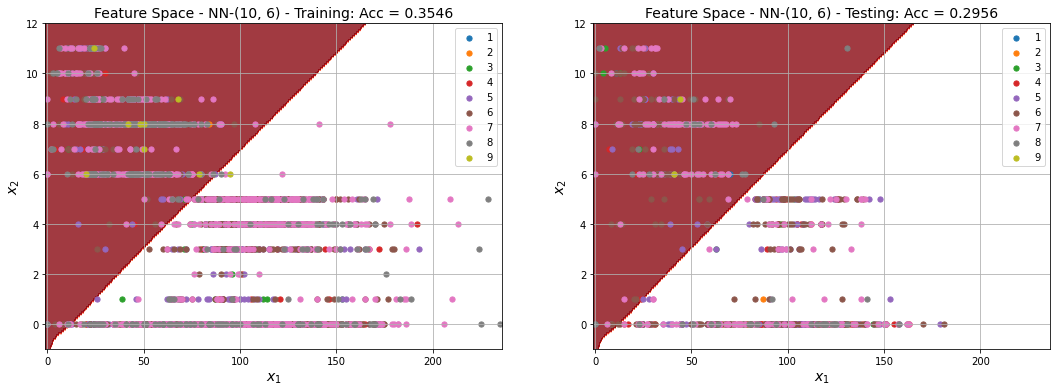

In [ ]:
# Display results 
show_clf_results(clf,nt.x_train,nt.y_train,nt.x_test,nt.y_test,y0,ypred,nn_st,decisionline=1)

# Darkmatter 2.0

In [ ]:
class PlatformDM:
  def __init__(self, filename,
               cols:list = ['imdb_score', 'calification_num'], # 'release_year', 
              #  colsF:list = ['age_certification'], #,'genres' 'age_certification', 
               label = 'calification_num',
               labelSubd = (0,10,1), #(0,100,10), # (min,max,step) # or None
               ptrain = 0.8 #,
              #  cols_drop = ['description','seasons','imdb_id','tmdb_popularity','imdb_votes','tmdb_score']
              ):
    self.filename = f'data/{filename}.csv'
    self.df_ini = pd.read_csv(self.filename)
    #self.df_ini['calification_num'] = self.df_ini['calification_num'].fillna('Bad')
    

    cols_drop = []
    for c in self.df_ini.columns:
      if c not in cols+[label]: cols_drop += [c]
    self.df = self.df_ini.drop(columns=cols_drop)
    self.df = self.df.dropna().drop_duplicates()

    self.cols = cols
    # si usamos columnas categoricas, se deben convertir a int
    
    for c in cols:
      if self.df.dtypes[c] == object:
        # print('obj')
        le = LabelEncoder()
        le.fit(self.df[c])
        # list(le.classes_)
        self.df[f'{c}_bk'] = self.df[c]
        self.df[c] = le.transform(self.df[c])
        # self.cols += [f'{c}_n']
    
    if labelSubd != None:
      _min, _max, _step = labelSubd
      bins = np.arange(_min, _max+1, _step)
      names = np.arange( (_max - _min)/_step, dtype=int )
      self.df.loc[self.df[label] > _max, label] = _max
      self.df[f'{label}_bk'] = self.df[label]
      self.df[label] = pd.cut(self.df[label], bins, labels=names)      

    self.n = len(self.df)
    self.n_train = int( self.n * ptrain )
    # self.n_test = self.n - self.n_test
    # df_dm[['release_year', 'age_certification', 'runtime', 'genres']]
    self.x_train = np.array(self.df[self.cols][:self.n_train])
    self.y_train = np.ravel(self.df[label][:self.n_train])#.astype('float')
    # self.y_train = np.floor(self.y_train)
    self.x_test = np.array(self.df[self.cols][self.n_train+1:])
    self.y_test = np.ravel(self.df[label][self.n_train+1:])#.astype('float')
    # self.y_test = np.floor(self.y_test)

In [ ]:
dm2 = PlatformDM('darkmatter_tittles')

In [ ]:
dm2.x_train

array([[9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 1],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 1],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0],
       [9, 0]])

In [ ]:
dm2.y_test

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
dm2.df #.dtypes['id'] == object #['imdb_score'] #tmdb_popularity

,imdb_score,calification_num,imdb_score_bk
0,9,1,10.0
1,9,1,10.0
2,9,1,10.0
4,9,1,10.0
5,9,1,10.0
...,...,...,...
385,9,0,10.0
450,9,0,10.0
476,9,0,10.0
750,9,0,10.0


In [ ]:
print(len(dm2.x_train), len(dm2.x_test))

52 12


In [ ]:
# Definitions
alpha       = 1e-5          # learning rate
nh          = (10,6)        # nodes of hidden layers
tmax        = 2000          # max number of iterations
solver      = 'adam'        # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)
activation  = 'logistic'    # 'identity', 'logistic', 'tanh', 'relu'

# Training
clf = MLPClassifier(solver=solver, alpha=alpha,hidden_layer_sizes=nh, 
                    random_state=1,max_iter=tmax, activation=activation)
clf.fit(dm2.x_train, dm2.y_train)

# Evaluation on training subset 
y0  = clf.predict(dm2.x_train)
    
# Evaluation on testing subset 
ypred  = clf.predict(dm2.x_test)


Training:
Confusion Matrix:
[[52]]
Accuracy = 100.00
Testing:
Confusion Matrix:
[[12]]
Accuracy = 100.00


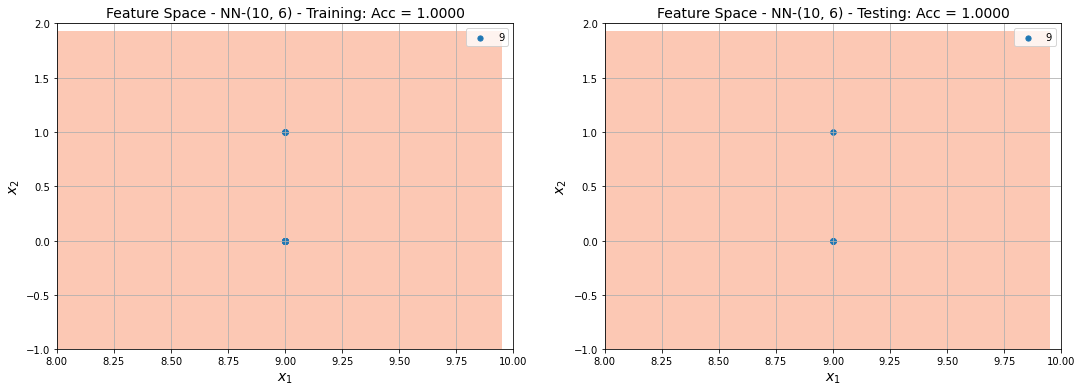

In [ ]:
show_clf_results(clf,dm2.x_train,dm2.y_train,dm2.x_test,dm2.y_test,y0,ypred,nn_st,decisionline=1)